### Load essential libraries

In [2]:
import pandas as pd
import numpy as np
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

### Load data

In [3]:
df = pd.read_csv('twitter-data/twitter_16m.csv', encoding = 'latin1', header = None)

In [4]:
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


### Assigning colums 

In [5]:
df = df[[5, 0]]

In [6]:
df.columns = ['twitts', 'sentiment']

In [7]:
df.head()

,twitts,sentiment
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


In [8]:
df['sentiment'].value_counts()

4    800000
0    800000
Name: sentiment, dtype: int64

### Assigning Mappings to sentiment

In [9]:
sent_map ={0: 'negative', 4:'positive'}

### Word Counts

In [10]:
df['twitts'].apply(lambda x: len(str(x).split()))

0          19
1          21
2          18
3          10
4          21
           ..
1599995    11
1599996    11
1599997    11
1599998    12
1599999     5
Name: twitts, Length: 1600000, dtype: int64

save the num of word in each twitts in a new column for all the rows

In [11]:
df['word_counts']= df['twitts'].apply(lambda x: len(str(x).split()))

In [12]:
df.head()

,twitts,sentiment,word_counts
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19
1,is upset that he can't update his Facebook by ...,0,21
2,@Kenichan I dived many times for the ball. Man...,0,18
3,my whole body feels itchy and like its on fire,0,10
4,"@nationwideclass no, it's not behaving at all....",0,21


#### Characters Count

In [13]:
df['character_counts']= df['twitts'].apply(lambda x: len(x))

In [14]:
df.head()

,twitts,sentiment,word_counts,character_counts
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115
1,is upset that he can't update his Facebook by ...,0,21,111
2,@Kenichan I dived many times for the ball. Man...,0,18,89
3,my whole body feels itchy and like its on fire,0,10,47
4,"@nationwideclass no, it's not behaving at all....",0,21,111


### Average Word Length

In [15]:
def get_avg_word_len(x):
    words = x.split()
    word_len = 0
    for word in words:
        word_len = word_len + len(word)
        return word_len/len(words) # != len(x)/len(words)

In [16]:
df['avg_word_len'] = df['twitts'].apply(lambda x: get_avg_word_len(x))

In [17]:
len('this is nlp demo')

16

there are four words, so, we going to divide by 4

In [18]:
len('this is nlp demo')/4

4.0

this mean , there are 4 characters per words.

In [19]:
df.head()

,twitts,sentiment,word_counts,character_counts,avg_word_len
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,0.578947
1,is upset that he can't update his Facebook by ...,0,21,111,0.095238
2,@Kenichan I dived many times for the ball. Man...,0,18,89,0.500000
3,my whole body feels itchy and like its on fire,0,10,47,0.200000
4,"@nationwideclass no, it's not behaving at all....",0,21,111,0.761905


you can see that so far we have extracted 4 features(sentiment, words, character and avg word length)

In [20]:
115/19

6.052631578947368

### Stop Words Counts

In [21]:
print(STOP_WORDS)

{'twelve', 'besides', 'during', 'front', 'beside', 'five', "'ve", 'one', '’s', 'must', 'behind', 'perhaps', 'then', 'though', 'once', 'ourselves', 'side', 'but', 'via', 'herself', 'how', 'seeming', 'several', 'seem', 'his', 'as', 'becoming', 'six', 'sometimes', 'himself', 'me', 'myself', 'made', 'off', 'wherein', 'being', 'you', 'to', 'yet', "'d", 'due', 'hundred', 'who', 'or', 'neither', 'twenty', '‘d', 'any', 'at', 'otherwise', 'something', 'nine', 'go', 'sixty', 'three', 'a', 'upon', 'elsewhere', '‘ll', '’d', '’re', 'whereas', 'now', '’ll', 'toward', 'else', 'bottom', 'an', 'from', 'rather', 'therein', 'nobody', 'only', 'some', 'forty', 'anyone', 'she', 'somewhere', 'towards', 'onto', 'after', 'however', 'thru', 'everything', 'cannot', 'your', 'all', 'among', 'into', 'never', 'make', 'whereupon', 'most', 'up', 'last', 'say', 'whose', 'per', '‘ve', 'whenever', 'least', 'again', 'anything', 'hers', 'over', 'why', 'anywhere', 'since', 'could', 'eight', 'whom', 'about', 'are', 'beforeha

In [22]:
#for your understanding , how it works
x= 'this is text data demo'
len([t for t in x.split() if t in STOP_WORDS])

2

this means, there are two stop words present in the data x

In [23]:
x.split()

['this', 'is', 'text', 'data', 'demo']

In [24]:
#Removing stop words
df['twitts'].apply(lambda x: len([t for t in x.split() if t in STOP_WORDS]))

0           4
1           9
2           7
3           5
4          10
           ..
1599995     4
1599996     1
1599997     5
1599998     3
1599999     0
Name: twitts, Length: 1600000, dtype: int64

In [25]:
#store this in a new column
df['stop_words_len'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t in STOP_WORDS]))

In [26]:
df.head()

,twitts,sentiment,word_counts,character_counts,avg_word_len,stop_words_len
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,0.578947,4
1,is upset that he can't update his Facebook by ...,0,21,111,0.095238,9
2,@Kenichan I dived many times for the ball. Man...,0,18,89,0.500000,7
3,my whole body feels itchy and like its on fire,0,10,47,0.200000,5
4,"@nationwideclass no, it's not behaving at all....",0,21,111,0.761905,10


### Count #HashTags and @Mentions

In [27]:
x =  'this is hashtag and this is @mentions'
#x = x.split()
#x

In [28]:
#word token
[ t for t in x.split() if t.startswith('#')]

[]

In [29]:
df['hashtags_count'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.startswith('#')]))
df['mentions_count'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.startswith('@')]))

In [30]:
df.head()

,twitts,sentiment,word_counts,character_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,0.578947,4,0,1
1,is upset that he can't update his Facebook by ...,0,21,111,0.095238,9,0,0
2,@Kenichan I dived many times for the ball. Man...,0,18,89,0.500000,7,0,1
3,my whole body feels itchy and like its on fire,0,10,47,0.200000,5,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,0.761905,10,0,1


### If numeric digits are present in twitts

In [31]:
df['numerics_count'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.isdigit()]))

In [32]:
df.head()

,twitts,sentiment,word_counts,character_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,0.578947,4,0,1,0
1,is upset that he can't update his Facebook by ...,0,21,111,0.095238,9,0,0,0
2,@Kenichan I dived many times for the ball. Man...,0,18,89,0.500000,7,0,1,0
3,my whole body feels itchy and like its on fire,0,10,47,0.200000,5,0,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,0.761905,10,0,1,0


### If there are any Upper case words are present in twitts

In [33]:
df['upper_count'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.isupper() and len(x)>3]))

In [34]:
df.head()

,twitts,sentiment,word_counts,character_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_count
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,0.578947,4,0,1,0,1
1,is upset that he can't update his Facebook by ...,0,21,111,0.095238,9,0,0,0,0
2,@Kenichan I dived many times for the ball. Man...,0,18,89,0.500000,7,0,1,0,1
3,my whole body feels itchy and like its on fire,0,10,47,0.200000,5,0,0,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,0.761905,10,0,1,0,1


In [35]:
#let look at some twitts
df.loc[96]['twitts']

"so rylee,grace...wana go steve's party or not?? SADLY SINCE ITS EASTER I WNT B ABLE 2 DO MUCH  BUT OHH WELL....."

### Preprocessing and cleaning of this text data

### Lower case conversion

In [36]:
df['twitts'] = df['twitts'].apply(lambda x: x.lower())

In [37]:
df.head(2)

,twitts,sentiment,word_counts,character_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_count
0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",0,19,115,0.578947,4,0,1,0,1
1,is upset that he can't update his facebook by ...,0,21,111,0.095238,9,0,0,0,0


### Correcting Contraction to Expansion

#examples of contraction
x = "i don't know what you want, can't, he'll, i'd". get a full list of contraction from wikipedia

In [38]:
x = "i don't know what you want, can't, he'll, i'd"

In [39]:
contractions = {"aight":"alright",
"ain't":"am not", 
"amn't": "am not",
"aren't": "are not",
"can't":"cannot",
"cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"daren't": "dare not",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"dunno":"don't know", 
"don't know":"do not know",
"d'ye":"do you",
"d'ye":"did you",
"e'er":"ever",
"everybody's":"everybody is",
"everyone's":"everyone is",
"i'd":"I would",
"i'd've": "I would have"
             
}

In [40]:
def cont_to_exp(x):
    if type(x) is str:
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
            return x
        else:
            return x

In [41]:
x = "hi, i'd be happy"

In [42]:
cont_to_exp(x)

"hi, i'd be happy"

In [43]:
%%time
df['twitts']= df['twitts'].apply(lambda x: cont_to_exp(x))

Wall time: 3.58 s


In [44]:
df.head()

,twitts,sentiment,word_counts,character_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_count
0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",0,19,115,0.578947,4,0,1,0,1
1,is upset that he can't update his facebook by ...,0,21,111,0.095238,9,0,0,0,0
2,@kenichan i dived many times for the ball. man...,0,18,89,0.500000,7,0,1,0,1
3,my whole body feels itchy and like its on fire,0,10,47,0.200000,5,0,0,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,0.761905,10,0,1,0,1


### Count and Remove Emails

In [45]:
import re

In [46]:
x = 'hi, email me at email@email.com another@email.com'

In [47]:
re.findall('r([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)', x)

[]

In [48]:
df['emails'] = df['twitts'].apply(lambda x: re.findall('r([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)', x))

In [49]:
df['emails_count'] = df['emails'].apply(lambda x: len(x))

In [50]:
df[df['emails_count']>0].head()

,twitts,sentiment,word_counts,character_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_count,emails,emails_count
4054,i want a new laptop. hp tx2000 is the bomb. :...,0,20,103,0.050000,6,0,0,0,4,[amos@yahoo.com],1
8496,@alexistehpom really? did you send out all th...,0,20,130,0.650000,11,0,1,0,0,[i@gmail.com],1
16413,"@jilliancyork got 2 bottom of it, human error...",0,21,137,0.619048,7,0,1,1,0,[ess@linkedin.com],1
72386,"madonnafae ok, i found this on a fluff page~ e...",0,22,136,0.454545,9,0,0,0,0,[qj8ga@facebook.com],1
74295,@lovetoblog i can't dm you my email cos you're...,0,16,105,0.687500,6,0,1,0,2,[en@live.co.uk],1


In [51]:
x

'hi, email me at email@email.com another@email.com'

In [52]:
re.sub(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)',  '', x)

'hi, email me at  '

In [53]:
#removing emails from the twitts
df['twitts'] = df['twitts'].apply(lambda x:re.sub(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)',  '', x))

In [54]:
df[df['emails_count']>0].head()

,twitts,sentiment,word_counts,character_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_count,emails,emails_count
4054,i want a new laptop. hp tx2000 is the bomb. :...,0,20,103,0.050000,6,0,0,0,4,[amos@yahoo.com],1
8496,@alexistehpom really? did you send out all th...,0,20,130,0.650000,11,0,1,0,0,[i@gmail.com],1
16413,"@jilliancyork got 2 bottom of it, human error...",0,21,137,0.619048,7,0,1,1,0,[ess@linkedin.com],1
72386,"madonnafae ok, i found this on a fluff page~ e...",0,22,136,0.454545,9,0,0,0,0,[qj8ga@facebook.com],1
74295,@lovetoblog i can't dm you my email cos you're...,0,16,105,0.687500,6,0,1,0,2,[en@live.co.uk],1


### Count URLs and remove it from the data

In [55]:
x= 'hi, to watch more go to https://youtube.com/skyline'

In [56]:
re.findall(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', x)

[('https', 'youtube.com', '/skyline')]

In [57]:
#count all urls
df['urls_flag']= df['twitts'].apply(lambda x:len(re.findall(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', x)))

In [58]:
re.sub(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?','', x)

'hi, to watch more go to '

In [59]:
df['twitts']= df['twitts'].apply(lambda x:re.sub(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?','', x))

In [126]:
df.head()

,twitts,sentiment,word_counts,character_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_count,emails,emails_count,urls_flag
0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",0,19,115,0.578947,4,0,1,0,1,[],0,"@switchfoot - awww, that's a bummer. you sho..."
1,is upset that he can't update his facebook by ...,0,21,111,0.095238,9,0,0,0,0,[],0,is upset that he can't update his facebook by ...
2,@kenichan i dived many times for the ball. man...,0,18,89,0.500000,7,0,1,0,1,[],0,@kenichan i dived many times for the ball. man...
3,my whole body feels itchy and like its on fire,0,10,47,0.200000,5,0,0,0,0,[],0,my whole body feels itchy and like its on fire
4,"@nationwideclass no, it's not behaving at all....",0,21,111,0.761905,10,0,1,0,1,[],0,"@nationwideclass no, it's not behaving at all...."


In [60]:
df.loc[0]['twitts']

"@switchfoot  - awww, that's a bummer.  you shoulda got david carr of third day to do it. ;d"

### Removing the re-twitts (RT)

In [61]:
df['twitts'] = df['twitts'].apply(lambda x: re.sub('RT', "", x))

In [62]:
df.head()

,twitts,sentiment,word_counts,character_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_count,emails,emails_count,urls_flag
0,"@switchfoot - awww, that's a bummer. you sho...",0,19,115,0.578947,4,0,1,0,1,[],0,1
1,is upset that he can't update his facebook by ...,0,21,111,0.095238,9,0,0,0,0,[],0,0
2,@kenichan i dived many times for the ball. man...,0,18,89,0.500000,7,0,1,0,1,[],0,0
3,my whole body feels itchy and like its on fire,0,10,47,0.200000,5,0,0,0,0,[],0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,0.761905,10,0,1,0,1,[],0,0


### Removing Special characters or punctuation

In [63]:
df ['twitts'] = df['twitts'].apply(lambda x: re.sub('[^A-Z a-z 0-9-]+', '', x))

In [64]:
df.head()

,twitts,sentiment,word_counts,character_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_count,emails,emails_count,urls_flag
0,switchfoot - awww thats a bummer you shoulda...,0,19,115,0.578947,4,0,1,0,1,[],0,1
1,is upset that he cant update his facebook by t...,0,21,111,0.095238,9,0,0,0,0,[],0,0
2,kenichan i dived many times for the ball manag...,0,18,89,0.500000,7,0,1,0,1,[],0,0
3,my whole body feels itchy and like its on fire,0,10,47,0.200000,5,0,0,0,0,[],0,0
4,nationwideclass no its not behaving at all im ...,0,21,111,0.761905,10,0,1,0,1,[],0,0


### Removing multiple spaces  "  hi            hello        "

In [65]:
x = 'Thanks    for  watching  and  subcribing  for this channel '

In [66]:
" ".join(x.split())

'Thanks for watching and subcribing for this channel'

noticed that spaces btw words have been removed

In [67]:
df['twitts'] = df['twitts'].apply(lambda x: " ".join(x.split()))

In [68]:
df.head(2)

,twitts,sentiment,word_counts,character_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_count,emails,emails_count,urls_flag
0,switchfoot - awww thats a bummer you shoulda g...,0,19,115,0.578947,4,0,1,0,1,[],0,1
1,is upset that he cant update his facebook by t...,0,21,111,0.095238,9,0,0,0,0,[],0,0


### Removing HTML tags

In [71]:
from bs4 import BeautifulSoup

In [72]:
x = '<html><h2>Thanks for subcribing</h2></html>'

In [73]:
BeautifulSoup(x, 'lxml').get_text()

'Thanks for subcribing'

In [ ]:
%%time
df['twitts']=df['twitts'].apply(lambda  x:BeautifulSoup(x, 'lxml').get_text())

C:\Users\enny_\Anaconda3\lib\site-packages\bs4\__init__.py:219: UserWarning: "b'cookies'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
C:\Users\enny_\Anaconda3\lib\site-packages\bs4\__init__.py:219: UserWarning: "b'pictures'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


Wall time: 33min 8s


### Removing Accented Characters e.g 

In [ ]:
import unicodedata

In [76]:
#x = 'Acce`nted text'
x= 'ĀëěéáÁ'

In [ ]:
def remove_accented_chars(x):
    x = unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return x

In [ ]:
remove_accented_chars(x)

### SpaCy and NLP

### Remove Stop Words

In [ ]:
import spacy

In [ ]:
x = 'these are stop words removal code'

In [ ]:
" ".join([t for t in x.split() if t not in STOP_WORDS])

In [ ]:
df['twitts'] = df['twitts'].apply(lambda x: " ".join([t for t in x.split() if t not in STOP_WORDS]))

### Convert into base or root form of word

In [ ]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
x = 'kenichan dived times ball managed save 50 rest'

In [ ]:
# dive = dived, time = times, manage = managed

In [ ]:
def make_to_base(x):
    x_list = []
    doc = nlp(x)
    
    for token in doc:
        lemma = str(token.lemma_)
        if lemma == '-PRON-' or lemma == 'be':
            x_list.append(lemma)
            print(" ".join(x_list))

In [ ]:
make_to_base(x)

 ### Common words removal

In [92]:
df.head()['twitts']

0    switchfoot - awww thats bummer shoulda got dav...
1    upset cant update facebook texting cry result ...
2    kenichan dived times ball managed save 50 rest...
3                           body feels itchy like fire
4                 nationwideclass behaving im mad cant
Name: twitts, dtype: object

In [93]:
#join all those words
' '.join(df.head()['twitts'])

'switchfoot - awww thats bummer shoulda got david carr day d upset cant update facebook texting cry result school today blah kenichan dived times ball managed save 50 rest bounds body feels itchy like fire nationwideclass behaving im mad cant'

In [94]:
text = ' '.join(df['twitts'])

In [95]:
text = text.split()

In [96]:
freq_comm = pd.Series(text).value_counts()

In [98]:
#top 20 occurring words
freq_comm[:20]

im       178270
good      89366
day       82299
like      77735
-         69662
dont      67280
today     64512
going     64078
love      63421
cant      62869
work      62804
got       60749
time      56081
lol       55094
u         52833
know      51172
want      42070
new       41995
think     41040
night     41029
dtype: int64

In [99]:
f20 = freq_comm[:20]

In [100]:
f20

im       178270
good      89366
day       82299
like      77735
-         69662
dont      67280
today     64512
going     64078
love      63421
cant      62869
work      62804
got       60749
time      56081
lol       55094
u         52833
know      51172
want      42070
new       41995
think     41040
night     41029
dtype: int64

In [101]:
df['twitts']= df['twitts'].apply(lambda x: " ".join([t for t in x.split() if t not in f20]))

### Remove rare words

In [102]:
#top rare 20 words
rare20 = freq_comm[-20:]

In [103]:
rare20

richflight318        1
peoplewill           1
rideyou              1
luckymy              1
jaxandj              1
gisellesim           1
katiegoldsmith       1
annekaf              1
chickyxxx            1
newspeak             1
spreckenstein        1
radiothats           1
gankstarrr           1
mhhhhhhhhh           1
foreeeeeeeeeeever    1
niam                 1
oomy                 1
mentionpic           1
parentalz            1
watevvaaa            1
dtype: int64

In [104]:
rare = freq_comm[freq_comm.values == 1]

In [105]:
rare

googlewavequot    1
windowbiird       1
2marrows          1
meuble            1
60seconds         1
                 ..
niam              1
oomy              1
mentionpic        1
parentalz         1
watevvaaa         1
Length: 537330, dtype: int64

In [106]:
df['twitts']= df['twitts'].apply(lambda x: ' '.join([t for t in x.split() if t not in rare20]))

In [107]:
df.head(5)

,twitts,sentiment,word_counts,character_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_count,emails,emails_count,urls_flag
0,switchfoot awww thats bummer shoulda david carr d,0,19,115,0.578947,4,0,1,0,1,[],0,1
1,upset update facebook texting cry result schoo...,0,21,111,0.095238,9,0,0,0,0,[],0,0
2,kenichan dived times ball managed save 50 rest...,0,18,89,0.500000,7,0,1,0,1,[],0,0
3,body feels itchy fire,0,10,47,0.200000,5,0,0,0,0,[],0,0
4,nationwideclass behaving mad,0,21,111,0.761905,10,0,1,0,1,[],0,0


### Word Cloud Visualization

In [108]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [111]:
x = ' ' .join(text[:20000])

will take only 20000 words because text is huge file

In [112]:
len(text)

11300980

In [113]:
x

'switchfoot - awww thats bummer shoulda got david carr day d upset cant update facebook texting cry result school today blah kenichan dived times ball managed save 50 rest bounds body feels itchy like fire nationwideclass behaving im mad cant kwesidei crew need hug loltrish hey long time yes rains bit bit lol im fine thanks hows tatianak nope didnt twittera que muera spring break plain city snowing re-pierced ears caregiving couldnt bear watch thought ua loss embarrassing octolinz16 counts idk talk anymore smarrison wouldve didnt gun zac snyders doucheclown iamjazzyfizzle wish got watch miss iamlilnicki premiere hollis death scene hurt severely watch film wry directors cut file taxes lettya ahh ive wanted rent love soundtrack fakerpattypattz oh dear drinking forgotten table drinks alydesigns day didnt friend called asked meet mid valley todaybut ive time sigh angrybarista baked cake ated week going hoped blagh class 8 tomorrow hate wake people going cry sleep watching marley im sad mis

x, is the text data that we want for our wc. we will run it.

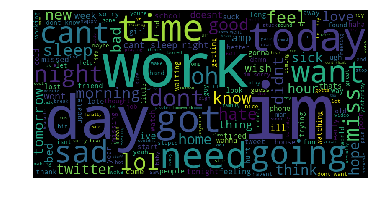

In [114]:
wc = WordCloud(width = 800, height =400).generate(x)
plt.imshow(wc)
plt.axis('off')
plt.show()

### Spellling correction using textblob

In [115]:
!pip install -U textblob

Requirement already up-to-date: textblob in c:\users\enny_\anaconda3\lib\site-packages (0.15.3)


In [116]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\enny_\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\brown.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\enny_\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\enny_\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\enny_\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\enny_\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\conll2000.zip.
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\enny_\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\movie_reviews.zip.
Finished.


In [117]:
from textblob import TextBlob

In [122]:
x = 'tanks forr scribing to this chanle carri'

In [123]:
x = TextBlob(x).correct()

In [124]:
x

TextBlob("tanks for ascribing to this change carry")

### Tokenization

In [125]:
x = 'thanks for subcribing to my channel. please like it'

In [126]:
TextBlob(x).words

WordList(['thanks', 'for', 'subcribing', 'to', 'my', 'channel', 'please', 'like', 'it'])

In [127]:
doc = nlp(x)
for token in doc:
    print(token)

thanks
for
subcribing
to
my
channel
.
please
like
it


### Lemmatization

In [128]:
x= 'runs, run, running, ran'

In [129]:
from textblob import Word

In [130]:
for token in x.split():
    print(Word(token).lemmatize())

runs,
run,
running,
ran


In [131]:
#with spacy
doc = nlp(x)
for token in doc:
    print(token.lemma_)

run
,
run
,
running
,
run


### Detect Entities using NER of SpaCy

In [132]:
x = 'CNN breaking news: Donald Trump, the president of the USA is looking forward to sign the trade agreement with China'

In [134]:
doc = nlp(x)
for ent in doc.ents:
    print(ent.text + ' - '+ ent.label_ + ' - '+ str(spacy.explain(ent.label_)))

CNN - ORG - Companies, agencies, institutions, etc.
Donald Trump - PERSON - People, including fictional
USA - GPE - Countries, cities, states
China - GPE - Countries, cities, states


In [135]:
from spacy import displacy

In [136]:
displacy.render(doc, style = 'ent')

### Detecting Nouns

In [137]:
x

'CNN breaking news: Donald Trump, the president of the USA is looking forward to sign the trade agreement with China'

In [139]:
for noun in doc.noun_chunks:
    print(noun)

CNN breaking news
Donald Trump
the president
the USA
the trade agreement
China


### Translation and Language Detection

language code: https://www.loc.gov/standards/iso639-2/php/code_list.php

In [142]:
x

'CNN breaking news: Donald Trump, the president of the USA is looking forward to sign the trade agreement with China'

In [140]:
tb = TextBlob(x)

In [141]:
tb.detect_language()

'en'

In [143]:
#translate english en to another language e.g chines language
tb.translate(to='zh')

TextBlob("美国有线电视新闻网重大新闻：美国总统唐纳德·特朗普期待与中国签署贸易协定")

In [144]:
#translate from english to french
tb.translate(to='fr')

TextBlob("Dernières nouvelles sur CNN: Donald Trump, le président des États-Unis, a hâte de signer l'accord commercial avec la Chine")

In [145]:
#translate from english to arabic

In [146]:
tb.translate(to='ar')

TextBlob("الأخبار العاجلة لشبكة CNN: يتطلع دونالد ترامب ، رئيس الولايات المتحدة ، إلى توقيع اتفاقية التجارة مع الصين")

In [147]:
#translate from english to hindi
tb.translate(to='hi')

TextBlob("सीएनएन ब्रेकिंग न्यूज़: अमरीका के राष्ट्रपति डोनाल्ड ट्रम्प चीन के साथ व्यापार समझौते पर हस्ताक्षर करने के लिए उत्सुक हैं")

### Use inbuilt sentiment classifier

In [148]:
from textblob.sentiments import NaiveBayesAnalyzer

In [149]:
x = 'We all stand together to fight Covid pandemic. We will win together'

In [150]:
tb = TextBlob(x, analyzer = NaiveBayesAnalyzer())

In [151]:
tb.sentiment

Sentiment(classification='pos', p_pos=0.698176480823015, p_neg=0.3018235191769852)

In [152]:
x_neg = 'We are all being challeneged by the virus and suffering is of greater proposition'

In [153]:
tb = TextBlob(x, analyzer = NaiveBayesAnalyzer())

In [154]:
tb.sentiment

Sentiment(classification='pos', p_pos=0.698176480823015, p_neg=0.3018235191769852)

### Advanced Text Processing

### N-Grams, are a combination of multiple words used together

In [155]:
x = 'thanks for subcribing'

In [156]:
tb = TextBlob(x)

In [157]:
tb.ngrams(2)

[WordList(['thanks', 'for']), WordList(['for', 'subcribing'])]

In [158]:
#in uni-gram
tb.ngrams(1)

[WordList(['thanks']), WordList(['for']), WordList(['subcribing'])]

In [159]:
#tri-gram
tb.ngrams(3)

[WordList(['thanks', 'for', 'subcribing'])]

### Bag of Words(BoW)

In [170]:
x = ['this is first sentence this is', 'this is second', 'this is last']

In [171]:
from sklearn.feature_extraction.text import CountVectorizer

In [172]:
cv = CountVectorizer(ngram_range=(1, 1))
text_counts = cv.fit_transform(x)

In [173]:
text_counts

<3x6 sparse matrix of type '<class 'numpy.int64'>'
	with 10 stored elements in Compressed Sparse Row format>

looks at uniques words and counts them

In [174]:
text_counts.toarray()

array([[1, 2, 0, 0, 1, 2],
       [0, 1, 0, 1, 0, 1],
       [0, 1, 1, 0, 0, 1]], dtype=int64)

In [175]:
cv.get_feature_names()

['first', 'is', 'last', 'second', 'sentence', 'this']

In [186]:
bow = pd.DataFrame(text_counts.toarray(), columns = cv.get_feature_names())

In [187]:
bow

,first,is,last,second,sentence,this
0,1,2,0,0,1,2
1,0,1,0,1,0,1
2,0,1,1,0,0,1


In [188]:
x

['this is first sentence this is', 'this is second', 'this is last']

### Term Frequency- is simply the ratio of the word present in a sentence, to the length of the sentence.

In [189]:
x

['this is first sentence this is', 'this is second', 'this is last']

In [190]:
bow

,first,is,last,second,sentence,this
0,1,2,0,0,1,2
1,0,1,0,1,0,1
2,0,1,1,0,0,1


In [191]:
bow.shape

(3, 6)

this means, there are three rows and 6 columns

In [192]:
tf = bow.copy()

In [193]:
for row in bow.iterrows():
    print(row[1])

first       1
is          2
last        0
second      0
sentence    1
this        2
Name: 0, dtype: int64
first       0
is          1
last        0
second      1
sentence    0
this        1
Name: 1, dtype: int64
first       0
is          1
last        1
second      0
sentence    0
this        1
Name: 2, dtype: int64


In [196]:
for index, row in enumerate(tf.iterrows()):
    for col in row[1].index:
        tf.loc[index, col]= tf.loc[index, col]/sum(row[1].values)

In [197]:
tf

,first,is,last,second,sentence,this
0,0.166667,0.333333,0.000000,0.000000,0.166667,0.333333
1,0.000000,0.333333,0.000000,0.333333,0.000000,0.333333
2,0.000000,0.333333,0.333333,0.000000,0.000000,0.333333


### Inverse document frequency(idf)

idf = log((1 + N)/(n+1))+ 1 used in sklearn when smooth_idf=True
where, N is the total number of rows and n is the number of rows in which the word was present.

In [1]:
import numpy as np

In [3]:
# x_df = pd.DataFrame(x, columns=['words'])

In [4]:
# x_df

In [6]:
# bow

In [7]:
# N = bow. shape[0]
# N

In [8]:
# bb = bow.astype('bool')
# bb

In [9]:
# bb['is'].sum()

In [10]:
# cols = bb.columns
# cols

In [11]:
# nz = []
# for col in cols:
#    nz.append(bb[col].sum())

In [12]:
# nz

In [13]:
# idf = []
# for index, col in enumerate(cols):
#    nz.append(np.log((N + 1)/(nz[index] + 1))+ 1)

In [14]:
# idf

In [15]:
# bow

### Term Frequency Inverse Document Frequency(TFIDF)

In [16]:
#from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
# tfidf = TfidfVectorizer()
# x_tfidf = tfidf.fit_transform(x_df['words'])

In [20]:
# x_tfidf.toarray()

In [21]:
# tfidf.idf_

### Word Embeddings

### SpaCy Word2Vec

In [22]:
!python -m spacy download en_core_web_lg

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\enny_\Anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 425, in _error_catcher
    yield
  File "C:\Users\enny_\Anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 507, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "C:\Users\enny_\Anaconda3\lib\http\client.py", line 449, in read
    n = self.readinto(b)
  File "C:\Users\enny_\Anaconda3\lib\http\client.py", line 493, in readinto
    n = self.fp.readinto(b)
  File "C:\Users\enny_\Anaconda3\lib\socket.py", line 586, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\enny_\Anaconda3\lib\ssl.py", line 1009, in recv_into
    return self.read(nbytes, buffer)
  File "C:\Users\enny_\Anaconda3\lib\ssl.py", line 871, in read
    return self._sslobj.read(len, buffer)
  File "C:\Users\enny_\Anaconda3\lib\ssl.py", line 631, in read
    v = self._sslobj.read(len, buffer)
socket.timeout: The read operation timed o

In [24]:
# nlp = spacy.load('en_core_web_lg')

In [25]:
# doc = nlp('thank you! welcome. dog cat lion dfasaa')

In [26]:
# for token in doc:
# print(token.text, token.has_vector)

### ML Models for Text Classification